In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:

df.info()


df.isnull().sum()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df['Car_Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [10]:
# Step 6: Make Car_Name Unique
df['Car_Name'] = df['Car_Name'] + '_' + df.index.astype(str)

# Verify uniqueness
print("Are all car names unique?", df['Car_Name'].is_unique)
df.head()


Are all car names unique? True


,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz_0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4_1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz_2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r_3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift_4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


df.head()


,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz_0,3.35,5.59,27000,2,0,1,0,11
1,sx4_1,4.75,9.54,43000,1,0,1,0,12
2,ciaz_2,7.25,9.85,6900,2,0,1,0,8
3,wagon r_3,2.85,4.15,5200,2,0,1,0,14
4,swift_4,4.60,6.87,42450,1,0,1,0,11


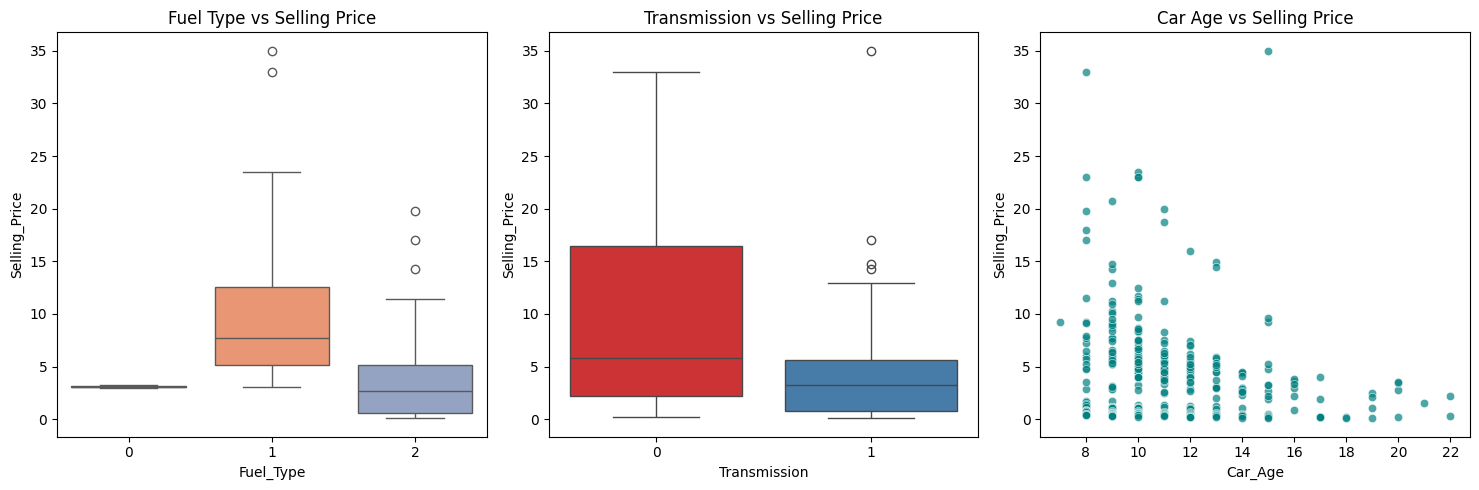

In [12]:
# Step 8: Exploratory Data Analysis (EDA)

plt.figure(figsize=(15, 5))

# 1️⃣ Selling_Price vs Fuel_Type
plt.subplot(1, 3, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, palette='Set2')
plt.title('Fuel Type vs Selling Price')

# 2️⃣ Transmission vs Selling_Price
plt.subplot(1, 3, 2)
sns.boxplot(x='Transmission', y='Selling_Price', data=df, palette='Set1')
plt.title('Transmission vs Selling Price')

# 3️⃣ Car_Age vs Selling_Price
plt.subplot(1, 3, 3)
sns.scatterplot(x='Car_Age', y='Selling_Price', data=df, alpha=0.7, color='teal')
plt.title('Car Age vs Selling Price')

plt.tight_layout()
plt.show()


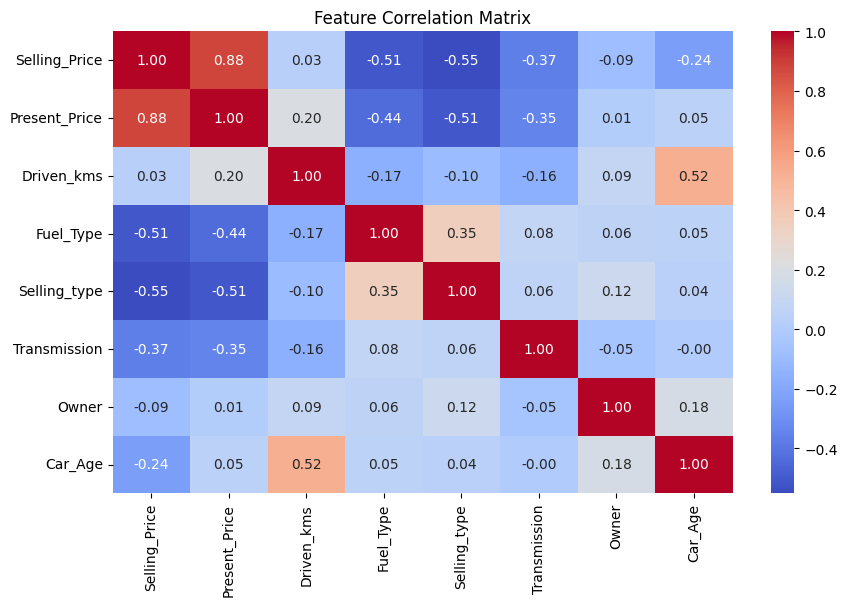

Correlation with Selling_Price:
 Selling_Price    1.000000
Present_Price    0.878914
Driven_kms       0.029187
Owner           -0.088344
Car_Age         -0.236141
Transmission    -0.367128
Fuel_Type       -0.509467
Selling_type    -0.550724
Name: Selling_Price, dtype: float64


In [25]:
# Step 9: Correlation matrix (CORRECTED)
# Drop 'Car_Name' as it's a string column and cannot be correlated.
df_corr = df.drop('Car_Name', axis=1)

plt.figure(figsize=(10, 6))
# Calculate correlation on the new DataFrame without 'Car_Name'
corr = df_corr.corr() 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# Optional: sort features by correlation with Selling_Price
corr_target = corr['Selling_Price'].sort_values(ascending=False)
print("Correlation with Selling_Price:\n", corr_target)

In [21]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)  # drop identifier for modeling
y = df['Selling_Price']

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 240, Testing samples: 61


In [22]:
# 🔹 3️⃣ Baseline Model: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Baseline Random Forest - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

Baseline Random Forest - MSE: 0.94, R2 Score: 0.96


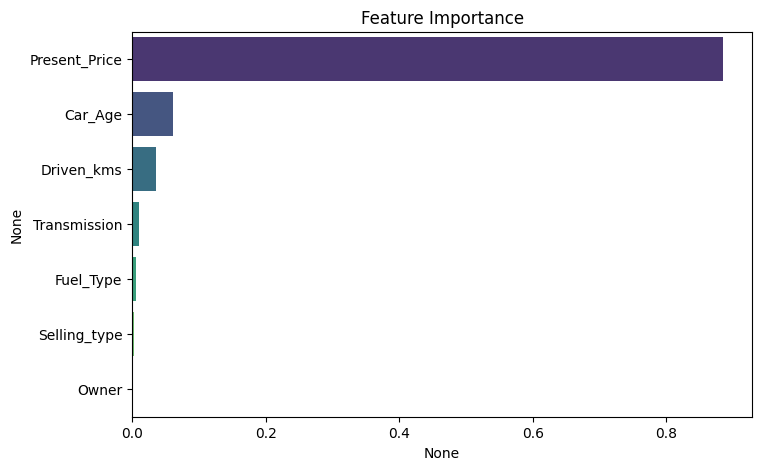

In [26]:
# Step 12: Feature Importance (Re-run after fixing Step 9)
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title('Feature Importance')
plt.show()

In [28]:
# 🔹 New cars data (include Present_Price)
new_cars = pd.DataFrame({
    'Car_Name': ['etios liva', 'etios cross'],
    'Year': [2011, 2014],
    'Present_Price': [5.71, 8.93],
    'Driven_kms': [43000, 83000],
    'Fuel_Type': ['Petrol', 'Diesel'],
    'Selling_type': ['Dealer', 'Dealer'],
    'Transmission': ['Manual', 'Manual'],
    'Owner': [0, 0]
})

# Step 1: Feature Engineering (Car Age)
new_cars['Car_Age'] = 2025 - new_cars['Year']
new_cars.drop('Year', axis=1, inplace=True)

# Step 2: Encode categorical columns
for col in ['Fuel_Type', 'Selling_type', 'Transmission']:
    new_cars[col] = label_encoder.fit_transform(new_cars[col])

# Step 3: Drop Car_Name for prediction
car_names = new_cars['Car_Name']
X_new = new_cars.drop('Car_Name', axis=1)

# Step 4: Predict selling price
predicted_prices = rf_model.predict(X_new)

# Step 5: Display results
for name, price in zip(car_names, predicted_prices):
    print(f"Predicted Selling Price of '{name}': ₹{price:.2f} lakhs")



Predicted Selling Price of 'etios liva': ₹3.52 lakhs
Predicted Selling Price of 'etios cross': ₹5.37 lakhs


In [30]:
y_test_pred = rf_model.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_test_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 0.94
Root Mean Squared Error (RMSE): 0.97
R² Score: 0.96


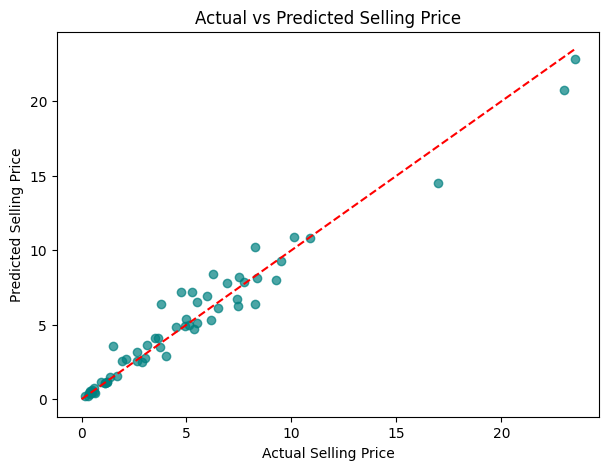

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred, color='teal', alpha=0.7)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()
